# Fertility data

In [71]:
'''Importing necessary libraries'''

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer 
from sklearn.linear_model import LinearRegression#
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r'C:\Users\anand\Downloads\archive\Fertility-Rate.xls') #Load data 

In [5]:
print('Number of rows in the dataset(No: of countries):',df.shape[0])
print('Number of columns in the dataset:',df.shape[1])
df.head()

Number of rows in the dataset(No: of countries): 215
Number of columns in the dataset: 58


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.316,7.354,7.385,7.410,7.425,7.430,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.186,6.076,5.956,5.833,5.711,5.594,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [6]:
print('No: of unique values in Indicator Name and Indicator Code columns:\n',
      'Indicator Name:',len(df['Indicator Name'].unique()),'\n',
      'Indicator Code:',len(df['Indicator Code'].unique()))

No: of unique values in Indicator Name and Indicator Code columns:
 Indicator Name: 1 
 Indicator Code: 1


As both the columns have only one value there is no much use for these columns.

In [7]:
df.drop(['Indicator Name','Indicator Code','Country Code'], axis = 1,inplace=True)
df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [8]:
'''Get transpose of the dataset to get different countries data as seperate 
columns so that this make analysis simpler'''

dt = df.transpose()
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,4.425,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,4.386,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,4.344,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,4.299,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311


In [9]:
dt.columns= df['Country Name'] # Change column names as country names
dt=dt.drop(['Country Name'],axis = 0) # Drop country name row from the dataset

dt.head()

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,4.425,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,4.386,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,4.344,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,4.299,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,NaN,7.671,7.425,5.711,6.861,3.068,4.161,NaN,4.25,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.24,7.347


In [10]:
dt= dt.reset_index() # Convert year as another column 
dt = dt.rename(columns = {'index':'Year'})
dt.head()

Country Name,Year,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
0,1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1,1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
2,1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
3,1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
4,1964,4.059,NaN,7.671,7.425,5.711,6.861,3.068,4.161,NaN,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.24,7.347


In [14]:
dt.dtypes

Country Name
Year                object
Aruba               object
Andorra             object
Afghanistan         object
Angola              object
                     ...  
Yemen, Rep.         object
South Africa        object
Congo, Dem. Rep.    object
Zambia              object
Zimbabwe            object
Length: 216, dtype: object

In [23]:
'''Convert all the object datatypes to float except for year as year should not be a float datatype'''

cols=dt.columns[1:] 
dt[cols] = dt[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [24]:
dt.describe() # Get descriptive statistics of the dataset

Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,54.000000,5.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,0.0,54.000000,...,54.000000,54.000000,54.000000,24.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.481592,1.216000,7.382833,7.016760,3.491778,4.526944,2.861741,2.55650,NaN,2.664611,...,3.348890,4.099075,5.189722,5.273333,5.728982,7.305167,4.146000,6.605482,6.668334,5.728741
std,0.806615,0.030496,0.722052,0.382652,1.376992,1.828982,0.390635,0.83481,NaN,0.815571,...,1.356373,1.862230,1.100065,0.908892,1.220348,1.494324,1.297788,0.429602,0.613945,1.525880
min,1.673000,1.180000,4.900000,5.863000,1.741000,1.801000,2.175000,1.68400,NaN,2.058000,...,1.770000,1.743000,3.382000,4.010000,4.147000,4.075000,2.387000,5.933000,5.687000,3.486000
25%,1.881750,1.190000,7.669000,6.852500,2.404000,2.674500,2.491500,1.73925,NaN,2.105250,...,2.185500,2.001500,4.390750,4.452250,4.512500,6.415750,2.874250,6.221000,6.077750,4.079750
50%,2.313500,1.220000,7.671000,7.187500,3.151500,4.916500,3.048500,2.43100,NaN,2.242500,...,2.979500,3.997000,5.109500,5.174000,5.457000,7.501500,4.114500,6.567500,6.705000,5.894000
75%,2.597750,1.240000,7.681750,7.208000,4.642250,6.245750,3.107750,2.91800,NaN,3.068500,...,4.466750,6.219500,6.050000,6.151750,6.928750,8.496500,5.395750,7.004250,7.283750,7.325250
max,4.820000,1.250000,7.869000,7.430000,6.186000,6.928000,3.391000,4.55000,NaN,4.425000,...,5.698000,6.494000,7.197000,6.548000,7.651000,9.223000,6.173000,7.267000,7.447000,7.420000


Fertility rate is given between 1 and 10.

In [25]:
null_list=dt.columns[dt.isnull().sum()/dt.shape[0] >=0.75]

In [26]:
dt[null_list].isnull().sum().sort_values(ascending=False)

Country Name
Taiwan, China                54
Northern Mariana Islands     54
American Samoa               54
Cayman Islands               54
Faeroe Islands               54
Tuvalu                       54
Monaco                       54
Turks and Caicos Islands     54
San Marino                   53
Palau                        51
Isle of Man                  51
Andorra                      49
Marshall Islands             48
St. Kitts and Nevis          48
Sint Maarten (Dutch part)    48
Dominica                     47
Curacao                      47
dtype: int64

We can drop these countries dataset as their dataset donot contain enough datapoints(75% of the datapoints in null value). 
The rest of the null values can be replaced by mean or median after analysis.

In [27]:
dt= dt.drop(columns=['Andorra','American Samoa', 'Curacao', 'Cayman Islands', 'Dominica',
       'Faeroe Islands', 'Isle of Man', 'St. Kitts and Nevis', 'Monaco',
       'Marshall Islands', 'Northern Mariana Islands', 'Palau', 'San Marino',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Tuvalu',
       'Taiwan, China'],axis=1)
dt.shape

(54, 199)

In [28]:
dt.isnull().sum().sort_values(ascending=False)

Country Name
Liechtenstein    40
Bermuda          39
Serbia           34
Seychelles       33
Greenland        30
                 ..
Namibia           0
Malaysia          0
Malawi            0
Mauritius         0
Year              0
Length: 199, dtype: int64

In [30]:
dt=dt.set_index(["Year"]) # Set index as year so that we can seperate the dataset from year to input into KNNImputer
   
dt.head()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,7.671,7.316,6.186,6.928,3.109,4.550,4.425,3.453,2.69,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,7.671,7.354,6.076,6.910,3.100,4.512,4.386,3.540,2.78,...,5.651,6.392,7.120,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,7.671,7.385,5.956,6.893,3.089,4.435,4.344,3.442,2.80,...,5.679,6.425,7.033,NaN,7.630,7.328,6.103,6.030,7.127,7.267
1963,4.271,7.671,7.410,5.833,6.877,3.078,4.317,4.299,3.332,2.82,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,7.671,7.425,5.711,6.861,3.068,4.161,4.250,3.146,2.79,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.240,7.347


In [32]:
imputer = KNNImputer(n_neighbors=5,weights='distance')
dt_filled= imputer.fit_transform(dt)

In [33]:
dt_filled

array([[4.82 , 7.671, 7.316, ..., 6.001, 7.018, 7.158],
       [4.655, 7.671, 7.354, ..., 6.015, 7.071, 7.215],
       [4.471, 7.671, 7.385, ..., 6.03 , 7.127, 7.267],
       ...,
       [1.69 , 5.395, 6.099, ..., 6.146, 5.773, 3.643],
       [1.681, 5.141, 5.979, ..., 6.039, 5.731, 3.564],
       [1.673, 4.9  , 5.863, ..., 5.933, 5.687, 3.486]], dtype=float32)

In [34]:
dt_imputed = pd.DataFrame(dt_filled, columns=dt.columns,index=dt.index)

In [35]:
dt_imputed.head()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,7.671,7.316,6.186,6.928,3.109,4.550,4.425,3.453,2.69,...,5.615,6.348,7.197,6.505144,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,7.671,7.354,6.076,6.910,3.100,4.512,4.386,3.540,2.78,...,5.651,6.392,7.120,6.505195,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,7.671,7.385,5.956,6.893,3.089,4.435,4.344,3.442,2.80,...,5.679,6.425,7.033,6.505203,7.630,7.328,6.103,6.030,7.127,7.267
1963,4.271,7.671,7.410,5.833,6.877,3.078,4.317,4.299,3.332,2.82,...,5.696,6.448,6.938,6.505252,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,7.671,7.425,5.711,6.861,3.068,4.161,4.250,3.146,2.79,...,5.698,6.464,6.836,6.505306,7.567,7.385,5.984,6.067,7.240,7.347


In [36]:
dt_imputed=dt_imputed.round(decimals=3)
dt_imputed.head()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,4.820,7.671,7.316,6.186,6.928,3.109,4.550,4.425,3.453,2.69,...,5.615,6.348,7.197,6.505,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,7.671,7.354,6.076,6.910,3.100,4.512,4.386,3.540,2.78,...,5.651,6.392,7.120,6.505,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,7.671,7.385,5.956,6.893,3.089,4.435,4.344,3.442,2.80,...,5.679,6.425,7.033,6.505,7.630,7.328,6.103,6.030,7.127,7.267
1963,4.271,7.671,7.410,5.833,6.877,3.078,4.317,4.299,3.332,2.82,...,5.696,6.448,6.938,6.505,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,7.671,7.425,5.711,6.861,3.068,4.161,4.250,3.146,2.79,...,5.698,6.464,6.836,6.505,7.567,7.385,5.984,6.067,7.240,7.347


In [37]:
dt_imputed.isnull().sum().sort_values(ascending=False)

Country Name
Zimbabwe         0
Guyana           0
Guatemala        0
Greenland        0
Grenada          0
                ..
Niger            0
New Caledonia    0
Namibia          0
Malaysia         0
Aruba            0
Length: 198, dtype: int64

Data is cleaned and imputed with KNNImputer

## Business Questions

The questions that can be answered with this dataset are:
1. Which are the countries that have highest and lowest fertitlity rates
2. What are the trends of fertility rates in developed and developing countries? Is there a differnece in trends?
3. Can you predict the fertility rates given 53 years fertility rates of the countries
4. Over 53 years how is the fertility rate varying is the medical developments increasing the fertility or the modern life style decreasing thte fertility rates.

## 1. Which are the countries that have highest and lowest fertitlity rates

In [47]:
dt_imputed.describe()

Country Name,Aruba,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.481592,7.382833,7.016760,3.491778,4.526944,2.861741,2.55650,2.664611,2.184833,1.760556,...,3.348890,4.099075,5.189722,5.959296,5.728982,7.305167,4.146000,6.605482,6.668334,5.728741
std,0.806615,0.722052,0.382652,1.376992,1.828982,0.390635,0.83481,0.815571,0.538190,0.494732,...,1.356373,1.862230,1.100065,0.861415,1.220348,1.494324,1.297788,0.429602,0.613945,1.525880
min,1.673000,4.900000,5.863000,1.741000,1.801000,2.175000,1.68400,2.058000,1.739000,1.330000,...,1.770000,1.743000,3.382000,4.010000,4.147000,4.075000,2.387000,5.933000,5.687000,3.486000
25%,1.881750,7.669000,6.852500,2.404000,2.674500,2.491500,1.73925,2.105250,1.840500,1.422500,...,2.185500,2.001500,4.390750,5.445750,4.512500,6.415750,2.874250,6.221000,6.077750,4.079750
50%,2.313500,7.671000,7.187500,3.151500,4.916500,3.048500,2.43100,2.242500,1.922000,1.505000,...,2.979500,3.997000,5.109500,6.505000,5.457000,7.501500,4.114500,6.567500,6.705000,5.894000
75%,2.597750,7.681750,7.208000,4.642250,6.245750,3.107750,2.91800,3.068500,2.467500,1.932500,...,4.466750,6.219500,6.050000,6.508000,6.928750,8.496500,5.395750,7.004250,7.283750,7.325250
max,4.820000,7.869000,7.430000,6.186000,6.928000,3.391000,4.55000,4.425000,3.540000,2.820000,...,5.698000,6.494000,7.197000,6.548000,7.651000,9.223000,6.173000,7.267000,7.447000,7.420000


In [40]:
print('Maximum mean value of fertility rate:',"%.3f" % np.max(dt_imputed.mean()),'\n Minimum mean value of fertility rate:',
 "%.3f" % np.min(dt_imputed.mean()))

Maximum mean value of fertility rate: 7.585 
 Minimum mean value of fertility rate: 1.482


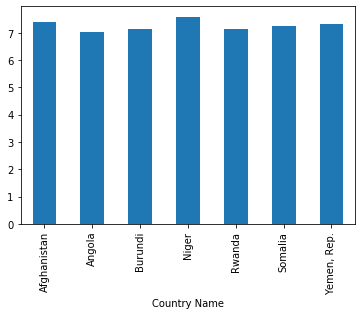

In [42]:
high=dt_imputed.columns[dt_imputed.mean()>=7]
dt_imputed[high].mean().plot(kind='bar')


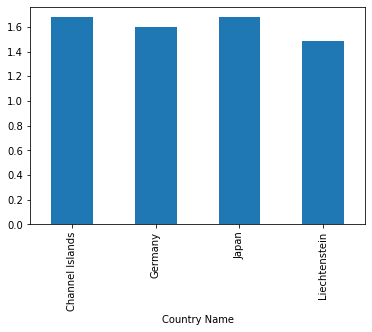

In [43]:
low=dt_imputed.columns[dt_imputed.mean()<1.7]
dt_imputed[low].mean().plot(kind='bar')

By looking at the average value of fertility over the yers for each country in the dataset we get that,
'Niger' is the country with highest fertility rates and 'Liechtenstein' is the country with least fertility rates.

## 2.What are the trends of fertility rates in developed and developing countries? Is there a difference in trends?

In [100]:
X =dt.index

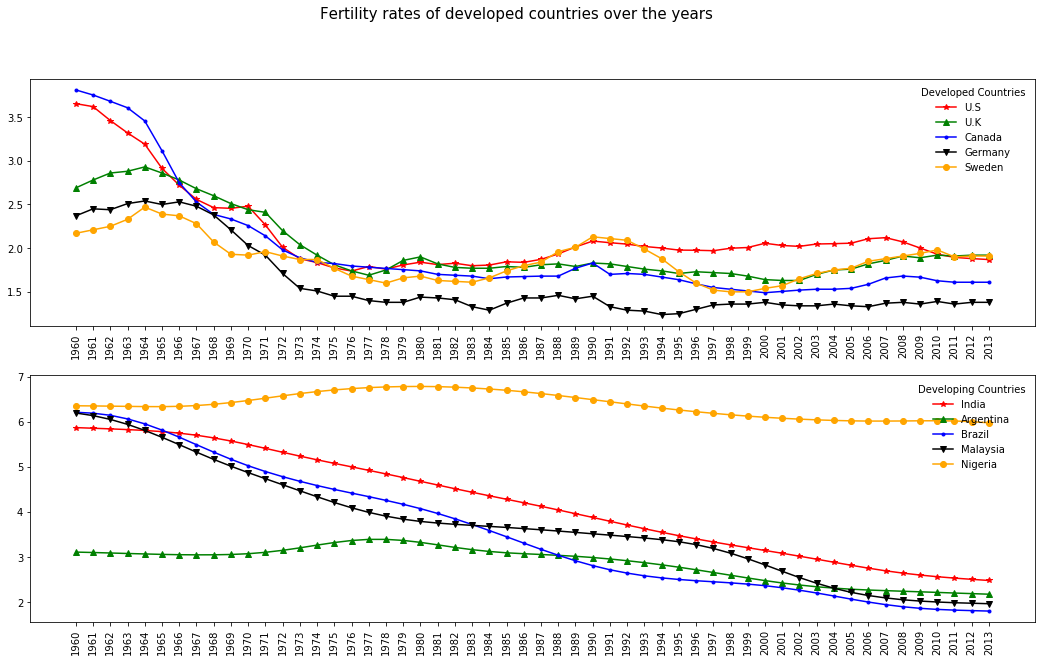

In [125]:
fig, ax = plt.subplots(2, figsize=(18, 10))

fig.suptitle('Fertility rates of developed countries over the years', fontsize=15)

ax[0].set_xticklabels(X, rotation=90)

ax[0].plot(X, dt['United States'], color="red", marker='*', label="U.S")
ax[0].plot(X, dt['United Kingdom'], color="green", marker='^', label="U.K")
ax[0].plot(X, dt['Canada'], color="blue", marker='.',label="Canada")
ax[0].plot(X, dt['Germany'], color="black",marker='v', label="Germany")
ax[0].plot(X, dt['Sweden'], color="orange",marker='o', label="Sweden")


ax[1].set_xticklabels(X, rotation=90)

ax[1].plot(X, dt['India'], color="red", marker='*', label="India")
ax[1].plot(X, dt['Argentina'], color="green", marker='^', label="Argentina")
ax[1].plot(X, dt['Brazil'], color="blue", marker='.', label="Brazil")
ax[1].plot(X, dt['Malaysia'], color="black",marker='v', label="Malaysia")
ax[1].plot(X, dt['Nigeria'], color="orange",marker='o', label="Nigeria")

ax[0].legend(loc="upper right", title="Developed Countries", frameon=False)
ax[1].legend(loc="upper right", title="Developing Countries", frameon=False)

plt.show()

Fertility rates of five developed and developing countries are taken to study thet trends in both classes.

It can be seen that the fertility rates of developing countries are much greater than that of developed countries.

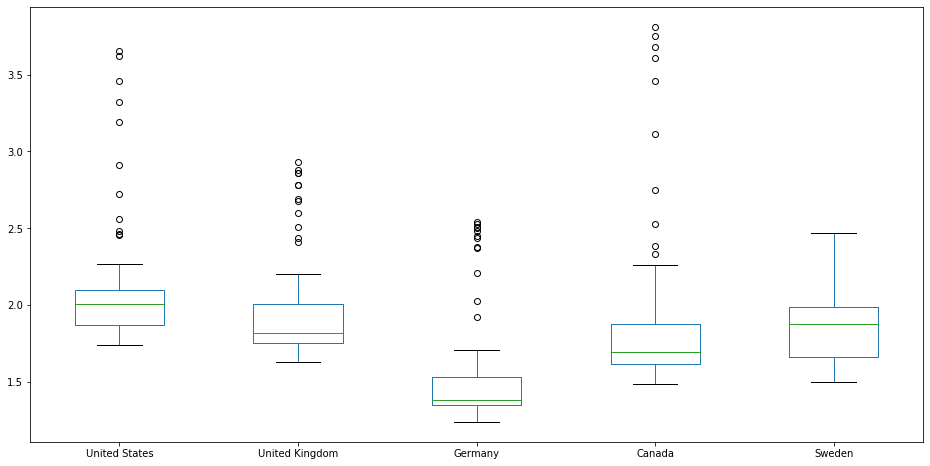

In [132]:
developed = ['United States','United Kingdom','Germany','Canada','Sweden']
dt[developed].plot(kind='box', figsize=[16,8])

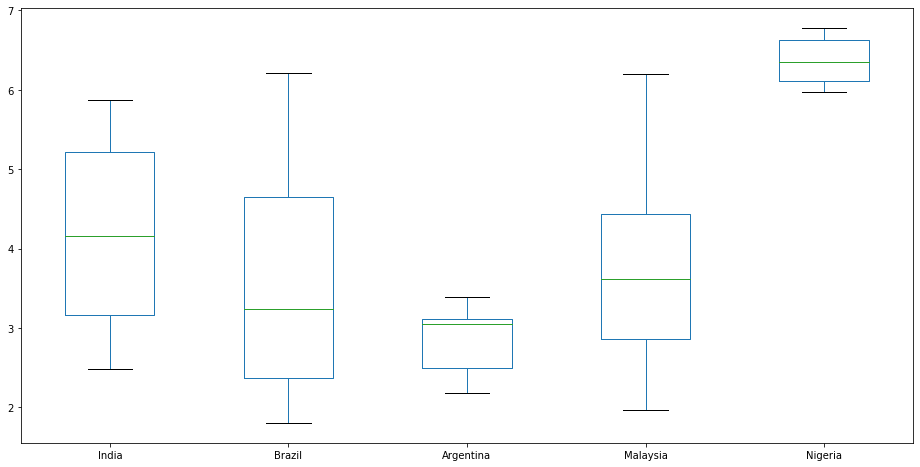

In [133]:
developing = ['India','Brazil','Argentina','Malaysia','Nigeria']
dt[developing].plot(kind='box', figsize=[16,8])

As we can see Nigeria has the highest fertility rated in developing countries and Sweden has better fertility rates in case of developed countries. Fertility rates of developed countries varies within limits 1 to 4 while in case of developing countries it is distributed from 2 to 7.